In [55]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train_label = y_train
y_test_label = y_test

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
# 1. Follow the instruction below and then report how the performance changed.(apply all at once)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# Max Pool layer with size 2×2.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer.
model.add(Flatten())
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Fully connected layer with 1024 units and a rectifier activation function.
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Fully connected layer with 512 units and a rectifier activation function.
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
# Dropout layer at 20%.
model.add(Dropout(0.2))
# Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))


In [7]:
# Compile model
#epochs = 25
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

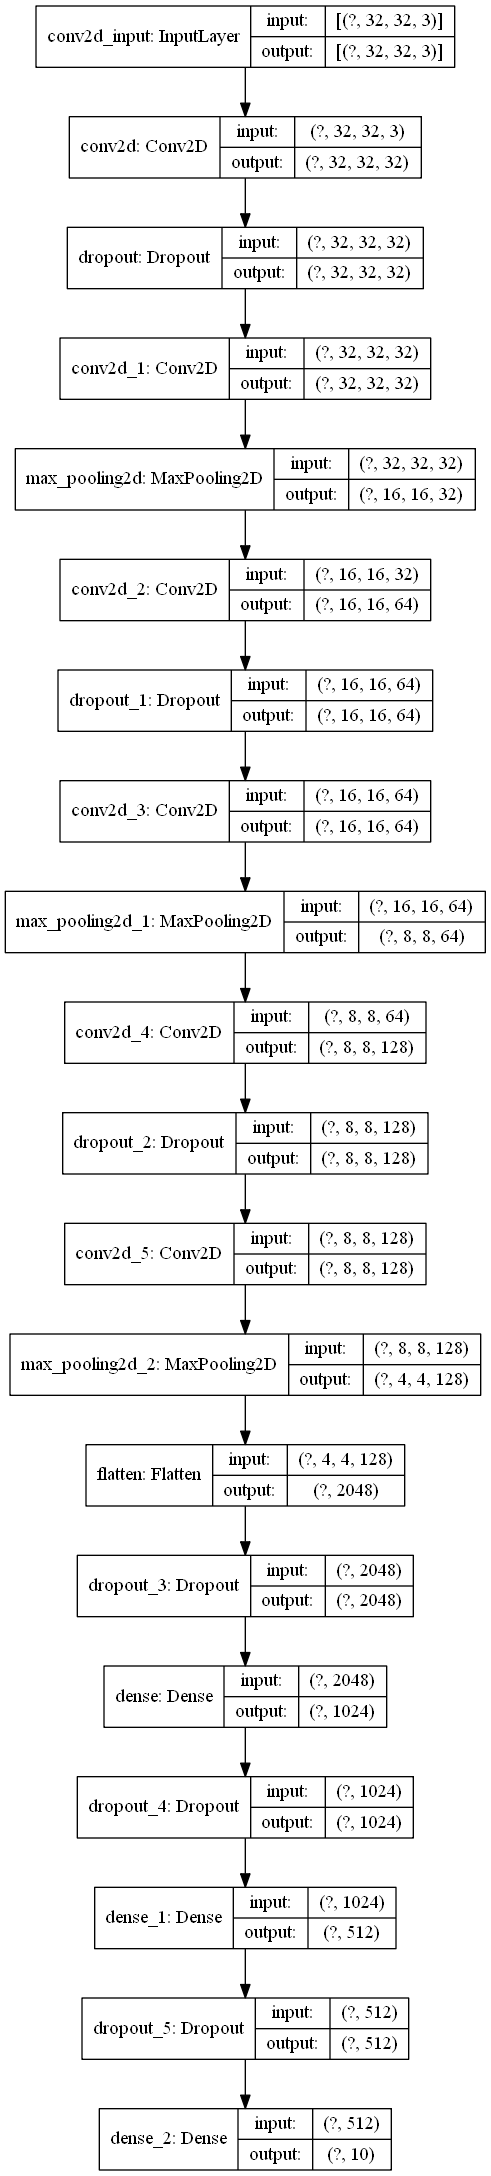

In [61]:
from tensorflow import keras
keras.utils.plot_model(model, 'model_shapes.png', show_shapes=True)

In [9]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, callbacks=[tensorboard])

Epoch 1/10
391/391 [==============================] - 313s 800ms/step - loss: 2.0590 - accuracy: 0.2380 - val_loss: 2.1892 - val_accuracy: 0.2151
Epoch 2/10
391/391 [==============================] - 319s 815ms/step - loss: 1.7108 - accuracy: 0.3718 - val_loss: 1.6248 - val_accuracy: 0.4243
Epoch 3/10
391/391 [==============================] - 308s 789ms/step - loss: 1.5112 - accuracy: 0.4507 - val_loss: 1.4068 - val_accuracy: 0.4926
Epoch 4/10
391/391 [==============================] - 309s 789ms/step - loss: 1.4055 - accuracy: 0.4899 - val_loss: 1.3117 - val_accuracy: 0.5258
Epoch 5/10
391/391 [==============================] - 308s 788ms/step - loss: 1.3276 - accuracy: 0.5197 - val_loss: 1.2743 - val_accuracy: 0.5405
Epoch 6/10
391/391 [==============================] - 308s 789ms/step - loss: 1.2636 - accuracy: 0.5460 - val_loss: 1.2215 - val_accuracy: 0.5559
Epoch 7/10
391/391 [==============================] - 308s 788ms/step - loss: 1.2065 - accuracy: 0.5665 - val_loss: 1.1418 -

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 62.40%


In [53]:
#2. predict the first 4 image of the test data. 
# Then, print the actual label for those 4 images (label means the probability associated with them) 
# to check if the model predicted correctly or not

def predict_firstN_images(n):
    for i in range(0,n):
        pred_value = model.predict(X_test[[i],:])
        pred_class = model.predict_classes(X_test[[i],:])
        pred_probability = model.predict_proba(X_test[[i],:])
        actual_value = y_test[[i],:]
        print("Actual value  :" +str(np.argmax(actual_value)))
        print("Predicted value  :" +str(pred_class[0]))
        print("Predicted probability  :" +str(pred_probability[0][0]))
        print()

In [54]:
predict_firstN_images(4)

Actual value  :3
Predicted value  :3
Predicted probability  :0.020993767

Actual value  :8
Predicted value  :8
Predicted probability  :0.13810638

Actual value  :8
Predicted value  :8
Predicted probability  :0.07694611

Actual value  :0
Predicted value  :0
Predicted probability  :0.7290628



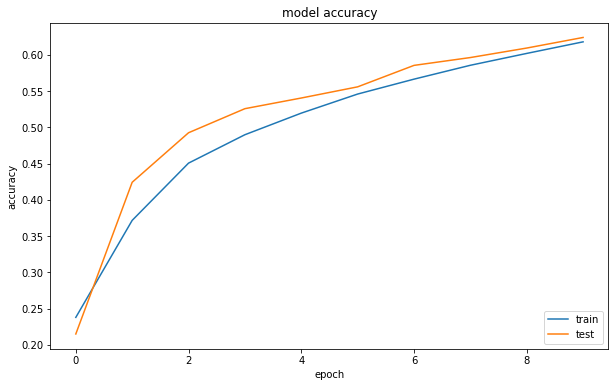

In [56]:
#3. Visualize Loss and Accuracy using the history object
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

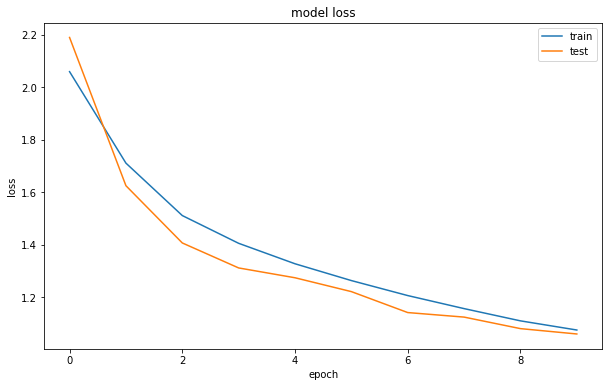

In [57]:
# using history object for plotting loss
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
## Bonus
# Program the question 2 using the saved model (.h5 model)
model.save('cifar10.h5')

In [58]:
from keras.models import load_model
model = load_model('cifar10.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 62.40%


In [60]:
predict_firstN_images(4)

Actual value  :3
Predicted value  :3
Predicted probability  :0.020993767

Actual value  :8
Predicted value  :8
Predicted probability  :0.13810638

Actual value  :8
Predicted value  :8
Predicted probability  :0.07694611

Actual value  :0
Predicted value  :0
Predicted probability  :0.7290628

